In [ ]:

!pip install nltk gensim
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk import ngrams
from nltk.util import ngrams
import gensim
from gensim.models.phrases import Phrases
from gensim.models import Word2Vec
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
from joblib import dump, load

In [2]:
%pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\daniela\appdata\local\programs\python\python38\lib\site-packages (1.24.1)




[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
#import nltk
#import re
import string
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


In [44]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
%pip install torch

                                              0.0/192.3 MB ? eta -:--:--
                                              0.2/192.3 MB 4.8 MB/s eta 0:00:41
                                             1.2/192.3 MB 15.6 MB/s eta 0:00:13
                                             2.1/192.3 MB 18.9 MB/s eta 0:00:11
                                             2.1/192.3 MB 18.9 MB/s eta 0:00:11
                                             2.1/192.3 MB 18.9 MB/s eta 0:00:11
                                              2.3/192.3 MB 7.4 MB/s eta 0:00:26
                                              3.1/192.3 MB 9.6 MB/s eta 0:00:20
                                              3.1/192.3 MB 9.6 MB/s eta 0:00:20
                                              3.1/192.3 MB 9.6 MB/s eta 0:00:20
                                              3.1/192.3 MB 9.6 MB/s eta 0:00:20
                                              3.1/192.3 MB 9.6 MB/s eta 0:00:20
                                              3

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


In [4]:

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [5]:
import os
from joblib import dump, load

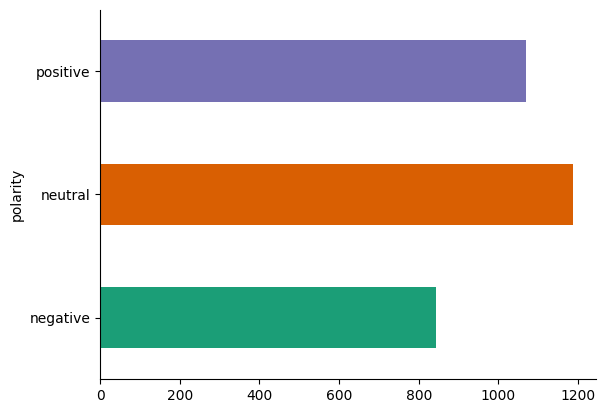

In [6]:
df = pd.read_csv('..//data/processed/train_final.csv')
df['text'].fillna('', inplace=True)
df['polarity'].fillna('unknown', inplace=True)

df.groupby('polarity').size().plot(kind='barh', color=sb.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## CountVectorizer

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'pos', 'neg', 'neu', 'sum', 'exclamation_freq', 'question_freq', 'uppercase_freq', 'word_count', 'char_count', 'emoticon_count']], df['polarity'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train['text'])
X_test_vect = vectorizer.transform(X_test['text'])

X_train_dense = X_train.drop('text', axis=1).to_numpy()
X_test_dense = X_test.drop('text', axis=1).to_numpy()
X_train_combined = pd.DataFrame(data=X_train_vect.toarray(), columns=vectorizer.get_feature_names_out()).join(pd.DataFrame(data=X_train_dense, columns=X_train.drop('text', axis=1).columns), rsuffix='_additional')
X_test_combined = pd.DataFrame(data=X_test_vect.toarray(), columns=vectorizer.get_feature_names_out()).join(pd.DataFrame(data=X_test_dense, columns=X_test.drop('text', axis=1).columns), rsuffix='_additional')

In [8]:
lr_classifier = LogisticRegression()
lr = lr_classifier.fit(X_train_combined, y_train)

dump(lr, '..//models/lr_classifier.joblib') 



['..//models/lr_classifier.joblib']

In [9]:
lr_loaded = load('..//models/lr_classifier.joblib') 


In [10]:
lr_predictions = lr_loaded.predict(X_test_combined)
print("\n Logistic Regression Classifier")
print("   - F1 score:", f1_score(y_test, lr_predictions, average='macro'))
print(classification_report(y_test, lr_predictions))


 Logistic Regression Classifier
   - F1 score: 0.7626599390401738
              precision    recall  f1-score   support

    negative       0.80      0.67      0.73       182
     neutral       0.70      0.77      0.73       244
    positive       0.82      0.83      0.83       194

    accuracy                           0.76       620
   macro avg       0.77      0.76      0.76       620
weighted avg       0.77      0.76      0.76       620



-------------------



In [ ]:
# Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_combined, y_train)
lr_predictions = lr_classifier.predict(X_test_combined)
print("\n Logistic Regression Classifier")
print("   - F1 score:", f1_score(y_test, lr_predictions, average='macro'))
print(classification_report(y_test, lr_predictions))

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_combined, y_train)
rf_predictions = rf_classifier.predict(X_test_combined)
print("\n Random Forest Classifier")
print("   - F1 score:", f1_score(y_test, rf_predictions, average='macro'))
print(classification_report(y_test, rf_predictions))

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_combined, y_train)
gb_predictions = gb_classifier.predict(X_test_combined)
print("\n Gradient Boosting Classifier")
print("   - F1 score:", f1_score(y_test, gb_predictions, average='macro'))
print(classification_report(y_test, gb_predictions))


 Logistic Regression Classifier
   - F1 score: 0.7565480825035809
              precision    recall  f1-score   support

    negative       0.78      0.69      0.73       182
     neutral       0.70      0.76      0.73       244
    positive       0.81      0.81      0.81       194

    accuracy                           0.75       620
   macro avg       0.76      0.75      0.76       620
weighted avg       0.76      0.75      0.75       620


 Random Forest Classifier
   - F1 score: 0.8121201127285058
              precision    recall  f1-score   support

    negative       0.81      0.77      0.79       182
     neutral       0.80      0.76      0.78       244
    positive       0.82      0.91      0.87       194

    accuracy                           0.81       620
   macro avg       0.81      0.81      0.81       620
weighted avg       0.81      0.81      0.81       620


 Gradient Boosting Classifier
   - F1 score: 0.8257727919142602
              precision    recall  f1-score  

# DeepChecks 



In [ ]:
%pip install deepchecks

In [ ]:
%pip install "deepchecks[nlp]"
%pip install "deepchecks[nlp-properties]"

In [10]:
from deepchecks.nlp.suites import train_test_validation

KeyboardInterrupt: 

In [1]:
from deepchecks.tabular.suites import train_test_validation

In [67]:
validation_suite = train_test_validation()
suite_result = validation_suite.run(X_train, X_test)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 5 categorical features were inferred.: pos, neg, neu, sum, emoticon_count
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical fe

DatasetValidationError: train and test datasets should share the same categorical features. Possible reason is that some columns wereinferred incorrectly as categorical features. To fix this, manually edit the categorical features using Dataset(cat_features=<list_of_features>

In [1]:
from deepchecks.nlp import TextData
from deepchecks.nlp.suites import data_integrity


In [11]:
train = TextData(X_train['text'], label=y_train, task_type='text_classification')
test = TextData(X_test['text'], label=y_test, task_type='text_classification')

In [12]:
data_integrity_suite = data_integrity()
data_integrity_suite.run(train, test)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_I92W4ZLN5T57RZGOCQK70Z3N4">Data Integrity Sui…

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, gb_predictions)
classification_rep = classification_report(y_test, gb_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Misclassified instances
misclassified_indices = np.where(gb_predictions != y_test)[0]
misclassified_samples = X_test.iloc[misclassified_indices]['text']
true_labels_misclassified = y_test.iloc[misclassified_indices]

misclassified_df = pd.DataFrame({
    'Prepocessed_Text': misclassified_samples.values,
    'True Label': true_labels_misclassified,
    'Predicted Label': gb_predictions[misclassified_indices]
})

misclassified_df = pd.merge(misclassified_df, df[['id', 'text']], left_on='Prepocessed_Text', right_on='text', how='left')

print("\nMisclassified Instances with Additional Information:")
print(misclassified_df)

Confusion Matrix:
[[141  30  11]
 [ 26 188  30]
 [  2   9 183]]

Misclassified Instances with Additional Information:
                                      Prepocessed_Text True Label  \
0    I just come across this idiom in some open - s...   negative   
1    I have see this bug in resharper 4.1 . it happ...   negative   
2    this be annoyingly annoying ... if you have a ...   negative   
3        hate to say it , but how about just test it ?   negative   
4        ( lack of line break in comment be sadden ! )   negative   
..                                                 ...        ...   
105  be there a keyboard shortcut or macro to colla...    neutral   
106  I have hear rumour that Angry Birds can make y...    neutral   
107  the exclamation mark make this question seem r...    neutral   
108  I could be miss something ( I be nothing of an...    neutral   
109  I be use this installation for a non - network...    neutral   

    Predicted Label     id                           

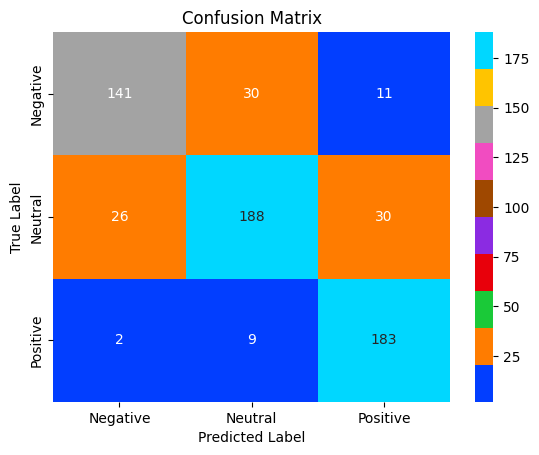

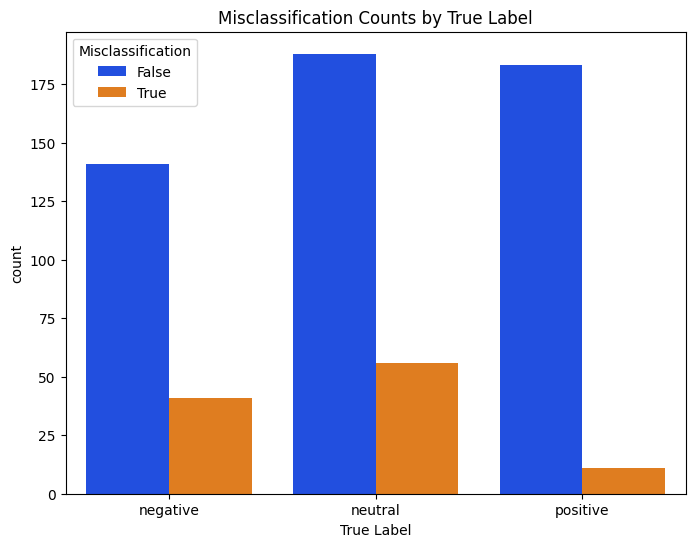

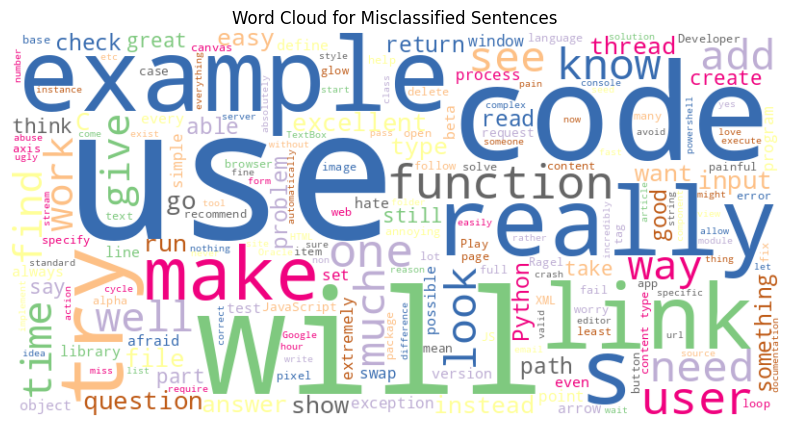

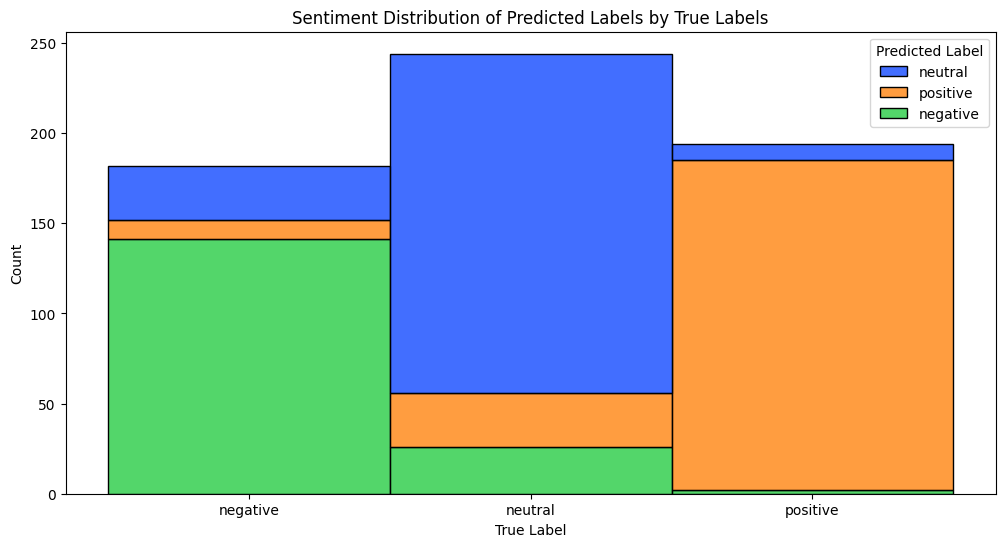

In [ ]:
pink_palette = sb.color_palette("bright")

# Confusion Matrix Heatmap
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap=pink_palette, xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Bar Chart for Misclassification Counts
misclassification_counts = pd.DataFrame({'True Label': y_test, 'Predicted Label': gb_predictions})
misclassification_counts['Misclassification'] = misclassification_counts['True Label'] != misclassification_counts['Predicted Label']

plt.figure(figsize=(8, 6))
sb.countplot(x='True Label', hue='Misclassification', data=misclassification_counts, palette=pink_palette)
plt.title('Misclassification Counts by True Label')
plt.show()

# Word Clouds for Misclassified Sentences
misclassified_sentences = np.array(misclassified_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Accent').generate(' '.join(misclassified_sentences))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Misclassified Sentences')
plt.show()

# Sentiment Distribution Plots
plt.figure(figsize=(12, 6))
sb.histplot(data=misclassification_counts, x='True Label', hue='Predicted Label', multiple='stack', palette=pink_palette)
plt.title('Sentiment Distribution of Predicted Labels by True Labels')
plt.show()

In [ ]:
print("\nMisclassified Instances:")
for index, row in misclassified_df.iterrows():
    print("Text: ", row['text'])
    print("True Label: ", row['True Label'])
    print("Predicted Label: ", row['Predicted Label'])
    print("--------------------------")


Misclassified Instances:
Text:  I just come across this idiom in some open - source Python , and I choke on my drink . rather than : or even : the code read : I can see this be the same result , but be this a typical idiom in Python ? if so , be it some performance hack that run fast ? or be it just a once - off that need a code review ?
True Label:  negative
Predicted Label:  neutral
--------------------------
Text:  I have see this bug in resharper 4.1 . it happen when the base class be in the App_Code directory . do not know how to fix it , very annoying , code still compile though .
True Label:  negative
Predicted Label:  neutral
--------------------------
Text:  this be annoyingly annoying ... if you have a the need to export your RegexBuddy history you can take a look at , which print to the console your history , also as Json .
True Label:  negative
Predicted Label:  neutral
--------------------------
Text:  hate to say it , but how about just test it ?
True Label:  negative
Pr

In [ ]:
train_original_df = pd.read_csv('/content/drive/MyDrive/MSc - CS/sa/dataset/train.csv')
merged_df = pd.merge(misclassified_df, train_original_df, on='id', how='left').drop('id', axis=1)
merged_df.to_csv('/content/drive/MyDrive/MSc - CS/sa/dataset/merged_csn_1.0.csv', index=False)

df1 = pd.read_csv('/content/drive/MyDrive/MSc - CS/sa/dataset/merged_csn.csv')

df2 = pd.read_csv('/content/drive/MyDrive/MSc - CS/sa/dataset/merged_csn_1.0.csv')

if df1.equals(df2):
    print("The content of the two CSV files is the same.")
else:
    print("The content of the two CSV files is different.")


The content of the two CSV files is different.


In [ ]:
merged_df

,Prepocessed_Text,True Label,Predicted Label,text_x,polarity,text_y
0,I just come across this idiom in some open - s...,negative,neutral,I just come across this idiom in some open - s...,negative,I just came across this idiom in some open-sou...
1,I have see this bug in resharper 4.1 . it happ...,negative,neutral,I have see this bug in resharper 4.1 . it happ...,negative,I've seen this bug in resharper 4.1. It happen...
2,this be annoyingly annoying ... if you have a ...,negative,neutral,this be annoyingly annoying ... if you have a ...,negative,This was annoyingly annoying... If you have a ...
3,"hate to say it , but how about just test it ?",negative,neutral,"hate to say it , but how about just test it ?",negative,"Hate to say it, but how about just testing it?"
4,( lack of line break in comment be sadden ! ),negative,positive,( lack of line break in comment be sadden ! ),negative,(lack of line breaks in comments is saddening!)
...,...,...,...,...,...,...
104,be there a keyboard shortcut or macro to colla...,neutral,positive,be there a keyboard shortcut or macro to colla...,neutral,Is there a keyboard shortcut or macro to colla...
105,I have hear rumour that Angry Birds can make y...,neutral,negative,I have hear rumour that Angry Birds can make y...,neutral,I've heard rumours that Angry Birds can make y...
106,the exclamation mark make this question seem r...,neutral,positive,the exclamation mark make this question seem r...,neutral,The exclamation mark makes this question seem ...
107,I could be miss something ( I be nothing of an...,neutral,positive,I could be miss something ( I be nothing of an...,neutral,I could be missing something (I'm nothing of a...


In [ ]:
irony = [
    "Holy thread abuse, Batman!",
    "I'm just going through the same process! I was looking at this page: <link> which starts talking about coffee shops! At that point I gave up. You've got to love java/oracle documentation!",
    "Shameeeee on me!!!",
    "I would've answered StackOverflow, but it's not open-source :)"
]

neutral = [
    "be very afraid?",
    "Pragmatic approach: See other answers for excellent backgrounders!",
    "ok i have tried this with NEO4J but not with great success! any tools suggestions ?",
    "Why do you hate Photoshop?"
]

print("+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+")
print('|                                                                                         IRONY SENTENCES                                                                                       |')
print("+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+")

for i in range(len(irony)):
    given_sentence = irony[i]

    is_sentence_in_merged_df = any(
        given_sentence.lower().strip() == text.lower().strip() for text in merged_df['text_y'].astype(str)
    )

    if is_sentence_in_merged_df:
        relevant_row = merged_df.loc[merged_df['text_y'].str.lower().str.strip() == given_sentence.lower().strip()]
        print(f"Sentence: {given_sentence}")
        print(f"True Label: {relevant_row['True Label'].values[0]}")
        print(f"Predicted Label: {relevant_row['Predicted Label'].values[0]}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    else:
        print(f"The sentence is NOT in misclassified_df['text'].")
        print(f"Sentence: {given_sentence}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

print("+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+")
print('|                                                                                      NEUTRAL SENTENCES                                                                                        |')
print("+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+")
for i in range(len(neutral)):
    given_sentence = neutral[i]

    is_sentence_in_merged_df = any(
        given_sentence.lower().strip() == text.lower().strip() for text in merged_df['text_y'].astype(str)
    )

    if is_sentence_in_merged_df:
        relevant_row = merged_df.loc[merged_df['text_y'].str.lower().str.strip() == given_sentence.lower().strip()]
        print(f"Sentence: {given_sentence}")
        print(f"True Label: {relevant_row['True Label'].values[0]}")
        print(f"Predicted Label: {relevant_row['Predicted Label'].values[0]}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    else:
        print(f"The sentence is NOT in misclassified_df['text'].")
        print(f"Sentence: {given_sentence}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                         IRONY SENTENCES                                                                                       |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
Sentence: Holy thread abuse, Batman!
True Label: negative
Predicted Label: positive
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The sentence is NOT in misclassified_df['text'].
Sentence: I'm just going through the same process! I was looking at this page: <link> which

Submission File - Best Configuration: CountVectorizer + Gradient Boosting Classifier

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/MSc - CS/sa/dataset/test_final.csv')
test_df['text'].fillna('', inplace=True)
print(test_df)

X_test_vect = vectorizer.transform(test_df['text'])
X_test_dense = test_df.drop('text', axis=1).to_numpy()
X_test_combined = pd.DataFrame(data=X_test_vect.toarray(), columns=vectorizer.get_feature_names_out()).join(pd.DataFrame(data=X_test_dense, columns=test_df.drop('text', axis=1).columns), rsuffix='_additional')

# Handle missing features in the test data
missing_features = set(X_train_combined.columns) - set(X_test_combined.columns)
for feature in missing_features:
    X_test_combined[feature] = 0

label_mapping = {
    'positive': 2,
    'neutral': 1,
    'negative': 0
}

X_test_combined = X_test_combined[X_train_combined.columns]

gb_predictions = gb_classifier.predict(X_test_combined)
gb_predictions_numeric = [label_mapping[pred] for pred in gb_predictions]

submission_df = pd.DataFrame({'Id': test_df['id'], 'Polarity': gb_predictions_numeric})

submission_df.to_csv('/content/drive/MyDrive/MSc - CS/sa/dataset/submission.csv', index=False)
print(submission_df)


         id                                               text  pos  neg  neu  \
0        t4  < @user > : excellent suggestion ! code change...    4   -1    1   
1        t5  any decent browser should protect against mali...    2   -1    1   
2        t8  I swear - I do not put pseudo code I get tell ...    1   -4   -1   
3        t9                                I have attach below    1   -1    0   
4       t13  when I refactor the follow line : use Resharpe...    1   -5   -1   
...     ...                                                ...  ...  ...  ...   
1321  t4414  < @user > - sure , I could have put a ` raise ...    2   -1    1   
1322  t4415                               excellent resource :    1   -1    0   
1323  t4418      +1 from I , I love the leap from MFC to Qt ;)    3   -1    1   
1324  t4420  work great ! and you can add " desc " after th...    3   -1    1   
1325  t4422  fortunately I be do * very * little with offic...    2   -1    1   

      sum  exclamation_freq

## CountVectorizer + Ngrams

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

results_list = []

for model_name, model in models:
    for N in range(1, 4):
        # training data to bag of words
        vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, N))
        X_train_vect = vectorizer.fit_transform(X_train['text'])
        X_test_vect = vectorizer.transform(X_test['text'])

        # concatenting bag-of-words matrix with additional features
        X_train_dense = X_train.drop('text', axis=1).to_numpy()
        X_test_dense = X_test.drop('text', axis=1).to_numpy()
        X_train_combined = pd.DataFrame(data=X_train_vect.toarray(), columns=vectorizer.get_feature_names_out()).join(pd.DataFrame(data=X_train_dense, columns=X_train.drop('text', axis=1).columns), rsuffix='_additional')
        X_test_combined = pd.DataFrame(data=X_test_vect.toarray(), columns=vectorizer.get_feature_names_out()).join(pd.DataFrame(data=X_test_dense, columns=X_test.drop('text', axis=1).columns), rsuffix='_additional')


        # TRAINING
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        f1 = np.round(f1_score(y_test, y_pred, average='macro'), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)

        result_dict = {
            'Model': model_name,
            'N-gram Range': (1, N),
            'F1 Score': f1,
            'Accuracy': accuracy
        }
        results_list.append(result_dict)

results_table = pd.DataFrame(results_list)
print(results_table)

                 Model N-gram Range  F1 Score  Accuracy
0  Logistic Regression       (1, 1)    0.7392    0.7371
1  Logistic Regression       (1, 2)    0.7662    0.7645
2  Logistic Regression       (1, 3)    0.7840    0.7823
3        Random Forest       (1, 1)    0.8174    0.8161
4        Random Forest       (1, 2)    0.8117    0.8113
5        Random Forest       (1, 3)    0.8231    0.8226
6    Gradient Boosting       (1, 1)    0.8275    0.8274
7    Gradient Boosting       (1, 2)    0.8258    0.8258
8    Gradient Boosting       (1, 3)    0.8239    0.8242


## W2V

In [ ]:
# Word2Vec embeddings with additional features
def get_embeddings_with_sentiment(tokenized_data, model, sentiment_features):
    X_data = []
    for i, tokens in enumerate(tokenized_data):
        embeddings = []
        for word in tokens:
            if word in model.wv.key_to_index:
                embeddings.append(model.wv.get_vector(word))
        if embeddings:
            mean_embedding = np.mean(embeddings, axis=0)
            combined_features = np.concatenate([mean_embedding, sentiment_features[i]])
            X_data.append(combined_features)
        else:
            X_data.append(np.zeros(model.wv.vector_size + len(sentiment_features[0])))
    return X_data

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/MSc - CS/sa/dataset/train_labelled_lemmas_count_sum_emot.csv')
df['text'].fillna('', inplace=True)
df['polarity'].fillna('unknown', inplace=True)

# Tokenization
df = df.dropna()
tokenized_train = df['text'].apply(lambda x: word_tokenize(str(x)))

X_train, X_test, y_train, y_test = train_test_split(tokenized_train, df[['polarity', 'pos', 'neg', 'neu', 'sum', 'exclamation_freq', 'question_freq', 'uppercase_freq', 'word_count', 'char_count', 'emoticon_count']], test_size=0.2, random_state=42)

In [ ]:
# Word2Vec model
w2v_train_data = list(map(lambda x: x, X_train))  # Word2Vec training dataset
model_w2v = Word2Vec(w2v_train_data, vector_size=200, window=5, min_count=5, sg=0, hs=0, negative=10, workers=100, seed=42)
model_w2v.train(w2v_train_data, total_examples=len(w2v_train_data), epochs=20)

# Word2Vec embeddings with additional features
sentiment_features_train = df.loc[X_train.index, ['pos', 'neg', 'neu', 'sum', 'exclamation_freq', 'question_freq', 'uppercase_freq', 'word_count', 'char_count', 'emoticon_count']].values
sentiment_features_test = df.loc[X_test.index, ['pos', 'neg', 'neu', 'sum', 'exclamation_freq', 'question_freq', 'uppercase_freq', 'word_count', 'char_count', 'emoticon_count']].values

X_train_embeddings = get_embeddings_with_sentiment(X_train, model_w2v, sentiment_features_train)
X_train_embeddings = np.array(X_train_embeddings)

tokenized_test = X_test.apply(lambda x: word_tokenize(str(x)))
X_test_embeddings = get_embeddings_with_sentiment(tokenized_test, model_w2v, sentiment_features_test)

svm = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

models = [svm, rf, gb]
model_names = ['SVM', 'Random Forest', 'Gradient Boosting']
accuracy_scores = []
f1_scores = []

# TRAINING
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    model_accuracy_scores = []
    model_f1_scores = []

    for train_index, val_index in kf.split(X_train_embeddings):
        X_train_fold, X_val_fold = X_train_embeddings[train_index], X_train_embeddings[val_index]
        y_train_fold, y_val_fold = np.array(y_train['polarity'])[train_index], np.array(y_train['polarity'])[val_index]

        model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred, average='macro')

        model_accuracy_scores.append(accuracy)
        model_f1_scores.append(f1)

    avg_accuracy = np.mean(model_accuracy_scores)
    avg_f1 = np.mean(model_f1_scores)

    accuracy_scores.append(avg_accuracy)
    f1_scores.append(avg_f1)

print('TRAINING AND VALIDATION')
results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'F1-Score': f1_scores})
print(results_df)

# TESTING
test_accuracy_scores = []
test_f1_scores = []

for model in models:
    model.fit(X_train_embeddings, y_train['polarity'])

    y_pred = model.predict(X_test_embeddings)

    accuracy = accuracy_score(y_test['polarity'], y_pred)
    f1 = f1_score(y_test['polarity'], y_pred, average='macro')

    test_accuracy_scores.append(accuracy)
    test_f1_scores.append(f1)

print('\nTESTING')
test_results_df = pd.DataFrame({'Model': model_names, 'Accuracy': test_accuracy_scores, 'F1-Score': test_f1_scores})
print(test_results_df)


TRAINING AND VALIDATION
               Model  Accuracy  F1-Score
0                SVM  0.429147  0.386430
1      Random Forest  0.819140  0.811997
2  Gradient Boosting  0.824381  0.817438

TESTING
               Model  Accuracy  F1-Score
0                SVM  0.456452  0.421777
1      Random Forest  0.520968  0.415426
2  Gradient Boosting  0.598387  0.576783


## TF-IDF

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSc - CS/sa/dataset/train_labelled_lemmas_count_sum_emot.csv')
df['text'].fillna('', inplace=True)
df['polarity'].fillna('unknown', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df[['text', 'pos', 'neg', 'neu', 'sum', 'exclamation_freq', 'question_freq', 'uppercase_freq', 'word_count', 'char_count', 'emoticon_count']], df['polarity'], test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

tfidf_vectorizer = TfidfVectorizer(analyzer='word', max_features=50000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

X_train_dense = X_train.drop('text', axis=1).to_numpy()
X_test_dense = X_test.drop('text', axis=1).to_numpy()
X_train_combined = pd.DataFrame(data=X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).join(pd.DataFrame(data=X_train_dense, columns=X_train.drop('text', axis=1).columns), rsuffix='_additional')
X_test_combined = pd.DataFrame(data=X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).join(pd.DataFrame(data=X_test_dense, columns=X_test.drop('text', axis=1).columns), rsuffix='_additional')

models = [
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

results_list = []

for model_name, model in models:
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    f1 = np.round(f1_score(y_test, y_pred, average='macro'), 4)
    accuracy = np.round(accuracy_score(y_test, y_pred), 4)

    result_dict = {
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Macro Score': f1
    }
    results_list.append(result_dict)

results_table = pd.DataFrame(results_list)
print(results_table)

SVM
Random Forest
Gradient Boosting
               Model  Accuracy  F1 Macro Score
0                SVM    0.4532          0.4194
1      Random Forest    0.8032          0.8037
2  Gradient Boosting    0.8129          0.8133


In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

additional_features_train = X_train.drop('text', axis=1).values
additional_features_test = X_test.drop('text', axis=1).values

X_train_combined = np.hstack((X_train_tfidf.toarray(), additional_features_train))
X_test_combined = np.hstack((X_test_tfidf.toarray(), additional_features_test))

vocabulary_size = X_train_tfidf.shape[1]

input_dim = vocabulary_size + additional_features_train.shape[1]
embedding_dim = 200
max_len = 100

X_train_pad = pad_sequences(X_train_combined, maxlen=max_len)
X_test_pad = pad_sequences(X_test_combined, maxlen=max_len)

label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_len))
model_lstm.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_lstm.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_lstm.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Testing
y_pred_prob = model_lstm.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_prob, axis=1)

f1_lstm = np.round(f1_score(np.argmax(y_test_encoded, axis=1), y_pred_lstm, average='macro'), 4)
accuracy_lstm = np.round(accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_lstm), 4)

result_dict_lstm = {
    'Model': 'LSTM',
    'F1 Score': f1_lstm,
    'Accuracy': accuracy_lstm
}

results_table_lstm = pd.DataFrame([result_dict_lstm])
print("\nResults:")
print(results_table_lstm)


Epoch 1/20
31/31 [==============================] - 53s 1s/step - loss: 1.0555 - accuracy: 0.4659 - val_loss: 0.9209 - val_accuracy: 0.6310
Epoch 2/20
31/31 [==============================] - 29s 940ms/step - loss: 0.7874 - accuracy: 0.6724 - val_loss: 0.7143 - val_accuracy: 0.6613
Epoch 3/20
31/31 [==============================] - 43s 1s/step - loss: 0.6775 - accuracy: 0.7269 - val_loss: 0.6448 - val_accuracy: 0.7762
Epoch 4/20
31/31 [==============================] - 20s 658ms/step - loss: 0.6216 - accuracy: 0.7562 - val_loss: 0.6430 - val_accuracy: 0.7762
Epoch 5/20
31/31 [==============================] - 23s 737ms/step - loss: 0.5759 - accuracy: 0.7658 - val_loss: 0.6709 - val_accuracy: 0.7379
Epoch 6/20
31/31 [==============================] - 20s 649ms/step - loss: 0.5374 - accuracy: 0.7839 - val_loss: 0.6967 - val_accuracy: 0.7298
Epoch 7/20
20/20 [==============================] - 1s 55ms/step

Results:
  Model  F1 Score  Accuracy
0  LSTM     0.751    0.7484


In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

additional_features_train = X_train.drop('text', axis=1).values
additional_features_test = X_test.drop('text', axis=1).values

X_train_combined = np.hstack((X_train_tfidf.toarray(), additional_features_train))
X_test_combined = np.hstack((X_test_tfidf.toarray(), additional_features_test))

vocabulary_size = X_train_tfidf.shape[1]

input_dim = vocabulary_size + additional_features_train.shape[1]
embedding_dim = 200
max_len = 100

X_train_pad = pad_sequences(X_train_combined, maxlen=max_len)
X_test_pad = pad_sequences(X_test_combined, maxlen=max_len)

label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_len))
model_lstm.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # Added return_sequences
model_lstm.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_lstm.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Testing
y_pred_prob = model_lstm.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_prob, axis=1)

f1_lstm = np.round(f1_score(np.argmax(y_test_encoded, axis=1), y_pred_lstm, average='macro'), 4)
accuracy_lstm = np.round(accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_lstm), 4)

result_dict_lstm = {
    'Model': 'LSTM',
    'F1 Score': f1_lstm,
    'Accuracy': accuracy_lstm
}

results_table_lstm = pd.DataFrame([result_dict_lstm])
print("\nResults:")
print(results_table_lstm)


Epoch 1/20
31/31 [==============================] - 52s 1s/step - loss: 1.0898 - accuracy: 0.3791 - val_loss: 1.0864 - val_accuracy: 0.3710
Epoch 2/20
31/31 [==============================] - 24s 785ms/step - loss: 1.0768 - accuracy: 0.3826 - val_loss: 1.0815 - val_accuracy: 0.3710
Epoch 3/20
31/31 [==============================] - 21s 696ms/step - loss: 1.0682 - accuracy: 0.3841 - val_loss: 1.0695 - val_accuracy: 0.3831
Epoch 4/20
31/31 [==============================] - 24s 742ms/step - loss: 1.0488 - accuracy: 0.5331 - val_loss: 1.0375 - val_accuracy: 0.5968
Epoch 5/20
31/31 [==============================] - 21s 685ms/step - loss: 0.9988 - accuracy: 0.5861 - val_loss: 0.9567 - val_accuracy: 0.6250
Epoch 6/20
31/31 [==============================] - 25s 795ms/step - loss: 0.9002 - accuracy: 0.6254 - val_loss: 0.8311 - val_accuracy: 0.6331
Epoch 7/20
31/31 [==============================] - 21s 681ms/step - loss: 0.8142 - accuracy: 0.6320 - val_loss: 0.7617 - val_accuracy: 0.6331
Ep